In [115]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

In [116]:
files = ['three_gen_lower_mut/'+file for file in os.listdir('three_gen_lower_mut/') if 'results' in file]
mrate_range = np.linspace(1e-6,1e-3,100)

In [117]:
all_three_gen, all_stamping = [], []

for i in range(100):

    with open('three_gen_lower_mut/results_'+str(i)+'.txt', 'rb') as f:
        res = pickle.load(f)
        
    all_three_gen.append(res['three_gen_result'])
    all_stamping.append(res['stamping_result'])

In [118]:
def construct_distribution(dict_res):
    ordered_results = np.zeros(100)
    for i in range(100):
        if i in dict_res:
            ordered_results[i] = dict_res[i]
    return(ordered_results)

In [119]:
dist_0_three_gen = construct_distribution(all_three_gen[0])

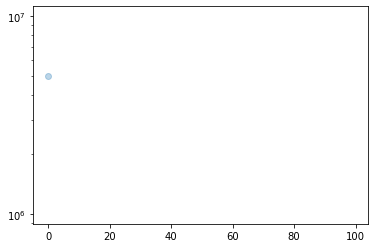

In [120]:
plt.scatter(np.arange(100), dist_0_three_gen, alpha = 0.3)
plt.yscale('log')

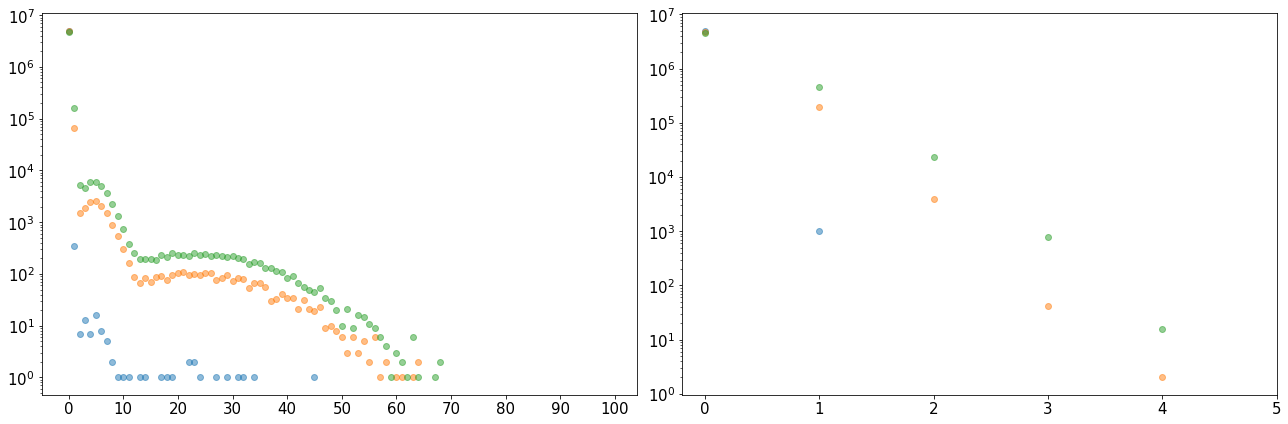

In [121]:
fig, ax = plt.subplots(1,2,figsize = (18,6))

ax[0].scatter(np.arange(100), construct_distribution(all_three_gen[0]), alpha = 0.5)
ax[0].scatter(np.arange(100), construct_distribution(all_three_gen[20]), alpha = 0.5)
ax[0].scatter(np.arange(100), construct_distribution(all_three_gen[50]), alpha = 0.5)

ax[0].plot(np.arange(100), construct_distribution(all_three_gen[0]), alpha = 0.)
ax[0].plot(np.arange(100), construct_distribution(all_three_gen[20]), alpha = 0.)
ax[0].plot(np.arange(100), construct_distribution(all_three_gen[50]), alpha = 0.)

ax[0].set_yscale('log')
ax[0].tick_params(labelsize = 15)
ax[0].set_xticks(np.arange(0,101,10))



ax[1].scatter(np.arange(5), construct_distribution(all_stamping[0])[:5], alpha = 0.5)
ax[1].scatter(np.arange(5), construct_distribution(all_stamping[20])[:5], alpha = 0.5)
ax[1].scatter(np.arange(5), construct_distribution(all_stamping[50])[:5], alpha = 0.5)

ax[1].plot(np.arange(5), construct_distribution(all_stamping[0])[:5], alpha = 0.)
ax[1].plot(np.arange(5), construct_distribution(all_stamping[20])[:5], alpha = 0.)
ax[1].plot(np.arange(5), construct_distribution(all_stamping[50])[:5], alpha = 0.)

ax[1].set_yscale('log')
ax[1].tick_params(labelsize = 15)
ax[1].set_xticks(np.arange(0,6,1))

plt.tight_layout()

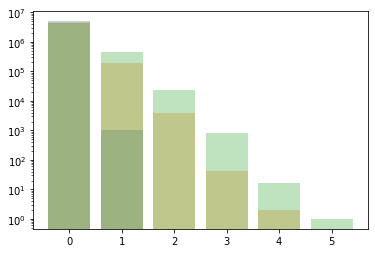

In [122]:
plt.bar(all_stamping[0].keys(), all_stamping[0].values(), alpha = 0.3)
plt.bar(all_stamping[20].keys(), all_stamping[20].values(), alpha = 0.3)
plt.bar(all_stamping[50].keys(), all_stamping[50].values(), alpha = 0.3)
plt.yscale('log')

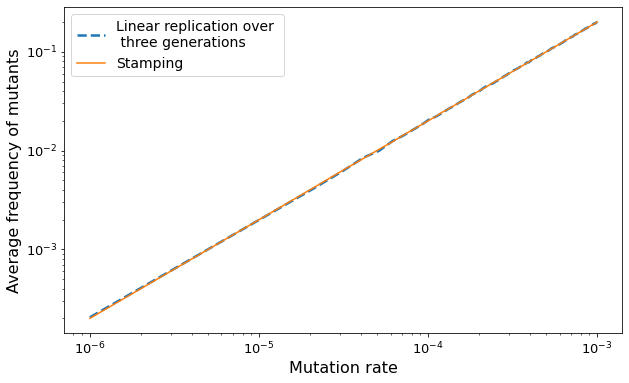

In [149]:
fig, ax = plt.subplots(figsize = (10,6))

ax.plot(mrate_range, [sum(construct_distribution(all_three_gen[i]) * np.arange(100))/5000000 for i in range(100)],
       linestyle = 'dashed', linewidth = 2.5)
ax.plot(mrate_range, [sum(construct_distribution(all_stamping[i]) * np.arange(100))/5000000 for i in range(100)])
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(['Linear replication over \n three generations', 'Stamping'], fontsize = 14)
ax.tick_params(labelsize = 13)
ax.set_ylabel('Average frequency of mutants', fontsize = 16)
ax.set_xlabel('Mutation rate', fontsize = 16)

plt.savefig('freq_mutants_comparison_stamping_threegen.jpg', dpi = 600, bbox_inches = 'tight')

In [153]:
7.14*(1-1e-6)**(29900) - 3

3.929673938688709

In [161]:
0.4*7.63*(1-1e-6)**(29900)

2.962095918890468

In [128]:
sum(construct_distribution(all_stamping[0]) * np.arange(100))

1000.0

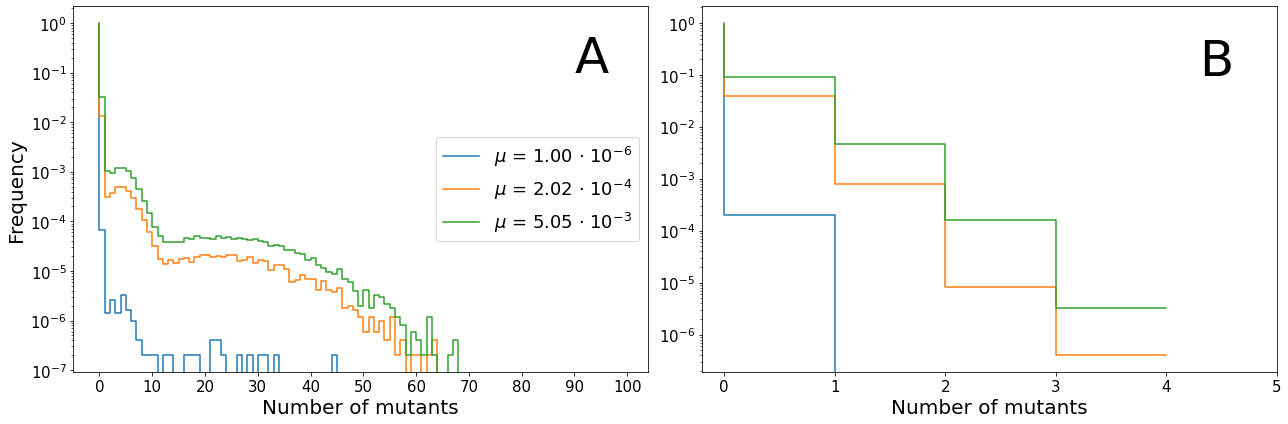

In [125]:
fig, ax = plt.subplots(1,2,figsize = (18,6))

ax[0].step(np.arange(100), construct_distribution(all_three_gen[0])/5000000)
ax[0].step(np.arange(100), construct_distribution(all_three_gen[20])/5000000)
ax[0].step(np.arange(100), construct_distribution(all_three_gen[50])/5000000)

ax[0].set_yscale('log')
ax[0].tick_params(labelsize = 15)
ax[0].set_xticks(np.arange(0,101,10))

ax[1].step(np.arange(5), construct_distribution(all_stamping[0])[:5]/5000000)
ax[1].step(np.arange(5), construct_distribution(all_stamping[20])[:5]/5000000)
ax[1].step(np.arange(5), construct_distribution(all_stamping[50])[:5]/5000000)

ax[1].set_yscale('log')
ax[1].tick_params(labelsize = 15)
ax[1].set_xticks(np.arange(0,6,1))

ax[0].legend(['$\mu$ = 1.00 $\cdot$ $10^{-6}$',
              '$\mu$ = 2.02 $\cdot$ $10^{-4}$',
              '$\mu$ = 5.05 $\cdot$ $10^{-3}$'], fontsize = 18, loc = 'center right')

ax[0].text(90, 0.1, 'A', fontsize = 50)
ax[1].text(4.3, 0.1, 'B', fontsize = 50)

ax[0].set_ylabel('Frequency', fontsize = 20)
ax[0].set_xlabel('Number of mutants', fontsize = 20)
ax[1].set_xlabel('Number of mutants', fontsize = 20)

plt.tight_layout()
plt.savefig('stamping_vs_three_generations_comparison.jpg', dpi = 600, bbox_inches = 'tight')

In [59]:
mrate_range[0]

1e-06